In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('yc_essential_data.csv')

In [3]:
data.head(5)

,id,name,slug,former_names,small_logo_thumb_url,website,all_locations,long_description,one_liner,team_size,...,batch,status,industries,regions,stage,app_video_public,demo_day_video_public,app_answers,question_answers,objectID
0,370,Wufoo,wufoo,[],https://bookface-images.s3.amazonaws.com/small...,http://wufoo.com,"Tampa, FL, USA",Wufoo is a web application that helps anybody ...,Online form builder.,11.0,...,W06,Acquired,"[""B2B"", ""Marketing""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,370
1,369,Project Wedding,project-wedding,[],/company/thumb/missing.png,http://projectwedding.com,"Bethesda, MD, USA","Finding wedding vendors is hard. In 2007, a co...",NaN,2.0,...,W06,Acquired,"[""Consumer"", ""Home and Personal""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,369
2,367,Clustrix,clustrix,[],https://bookface-images.s3.amazonaws.com/small...,http://clustrix.com,"San Francisco, CA, USA",Clustrix provides the leading scale-out relati...,NaN,51.0,...,W06,Acquired,"[""B2B"", ""Infrastructure""]","[""United States of America"", ""America / Canada""]",Growth,False,False,NaN,False,367
3,366,Inkling,inkling,[],/company/thumb/missing.png,http://inklingmarkets.com,"Chicago, IL, USA","Inkling, based in Chicago, Illinois, offers co...",NaN,11.0,...,W06,Acquired,"[""B2B"", ""Finance and Accounting""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,366
4,372,Audiobeta,audiobeta,[],/company/thumb/missing.png,http://audiobeta.com,"Somerville, MA, USA",AudioBeta develops web-based applications that...,NaN,0.0,...,W06,Inactive,"[""B2B"", ""Marketing""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,372


In [4]:
def get_season(batch: str):
    season = batch[0]
    year = "20" + batch[1:]
    return season

def get_year(batch: str):
    if batch.startswith("IK"):
        year = "20" + batch[2:]
    else:
        year = "20" + batch[1:]
    return year

In [5]:
data = data[data.batch != 'Unspecified']

data['year'] = data['batch'].apply(get_year)
data = data.set_index('id')

In [18]:
data.head()

,name,slug,former_names,small_logo_thumb_url,website,all_locations,long_description,one_liner,team_size,highlight_black,...,status,industries,regions,stage,app_video_public,demo_day_video_public,app_answers,question_answers,objectID,year
id,,,,,,,,,,,,,,,,,,,,,
370,Wufoo,wufoo,[],https://bookface-images.s3.amazonaws.com/small...,http://wufoo.com,"Tampa, FL, USA",Wufoo is a web application that helps anybody ...,Online form builder.,11.0,False,...,Acquired,"[""B2B"", ""Marketing""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,370,2006
369,Project Wedding,project-wedding,[],/company/thumb/missing.png,http://projectwedding.com,"Bethesda, MD, USA","Finding wedding vendors is hard. In 2007, a co...",NaN,2.0,False,...,Acquired,"[""Consumer"", ""Home and Personal""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,369,2006
367,Clustrix,clustrix,[],https://bookface-images.s3.amazonaws.com/small...,http://clustrix.com,"San Francisco, CA, USA",Clustrix provides the leading scale-out relati...,NaN,51.0,False,...,Acquired,"[""B2B"", ""Infrastructure""]","[""United States of America"", ""America / Canada""]",Growth,False,False,NaN,False,367,2006
366,Inkling,inkling,[],/company/thumb/missing.png,http://inklingmarkets.com,"Chicago, IL, USA","Inkling, based in Chicago, Illinois, offers co...",NaN,11.0,False,...,Acquired,"[""B2B"", ""Finance and Accounting""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,366,2006
372,Audiobeta,audiobeta,[],/company/thumb/missing.png,http://audiobeta.com,"Somerville, MA, USA",AudioBeta develops web-based applications that...,NaN,0.0,False,...,Inactive,"[""B2B"", ""Marketing""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,372,2006


In [6]:
import re
def clear_from_url(text):
    return re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)

In [7]:
df = data[['long_description', 'year']]
df = df.dropna()
df.index.name = None
df['descr'] = df['long_description'].apply(clear_from_url)
df['len_descr'] = df.descr.apply(len)
df = df[df['len_descr'] > 50]
df['how_different_from_500'] = np.abs(df['len_descr'] - 500)
df = df.drop('long_description', axis=1)
df = df.sort_values(by=['year'])

In [8]:
df.head(10)

,year,descr,len_descr,how_different_from_500
380,2005,What is Infogami?\n\nThe art of transforming d...,659,159
379,2005,Founded by Steve Huffman and Alexis Ohanian in...,457,43
378,2005,Kiko is a web calendar for anyone who wants to...,493,7
375,2005,ClickFacts is a Malware Software Solutions com...,787,287
374,2005,"Founded in 2005, TextPayMe is an SMS payment s...",1110,610
373,2005,"Loopt, based in Silicon-Valley and backed by l...",474,26
356,2006,Read and listen without limits. Unlimited* aud...,683,183
357,2006,OMGPOP is a leading developer of social games ...,327,173
355,2006,Xobni makes your inbox and address book smarte...,454,46
365,2006,"A platform bridging mobile text messages, emai...",347,153


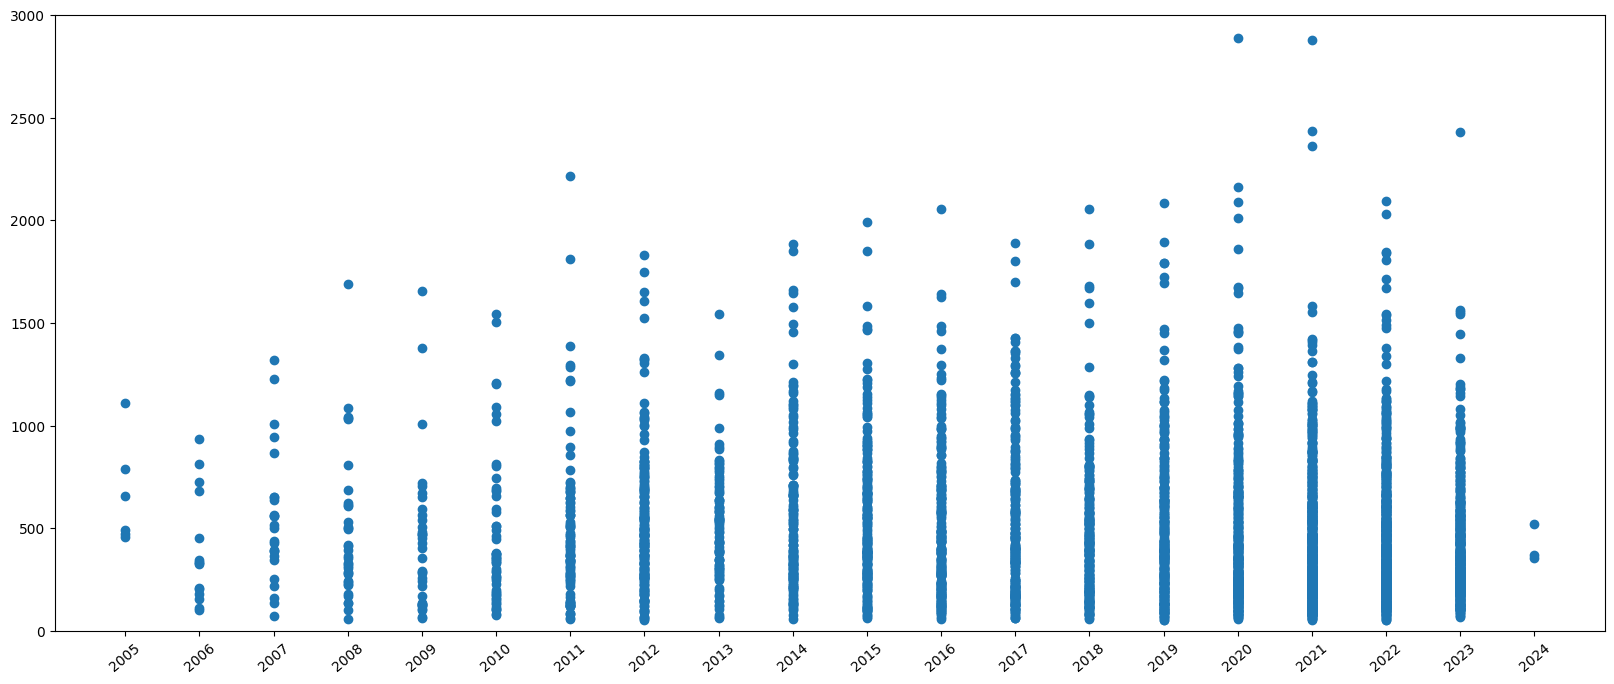

In [32]:
plt.figure(figsize=(20,8))
plt.scatter(df['year'], df['len_descr'])
plt.ylim(0, 3000)
plt.xticks(rotation=40);

In [9]:
mean_len_df = df.groupby("year").mean(numeric_only=True)
mean_len_df.reset_index(inplace=True)

Text(0.5, 1.0, 'Diff with 500')

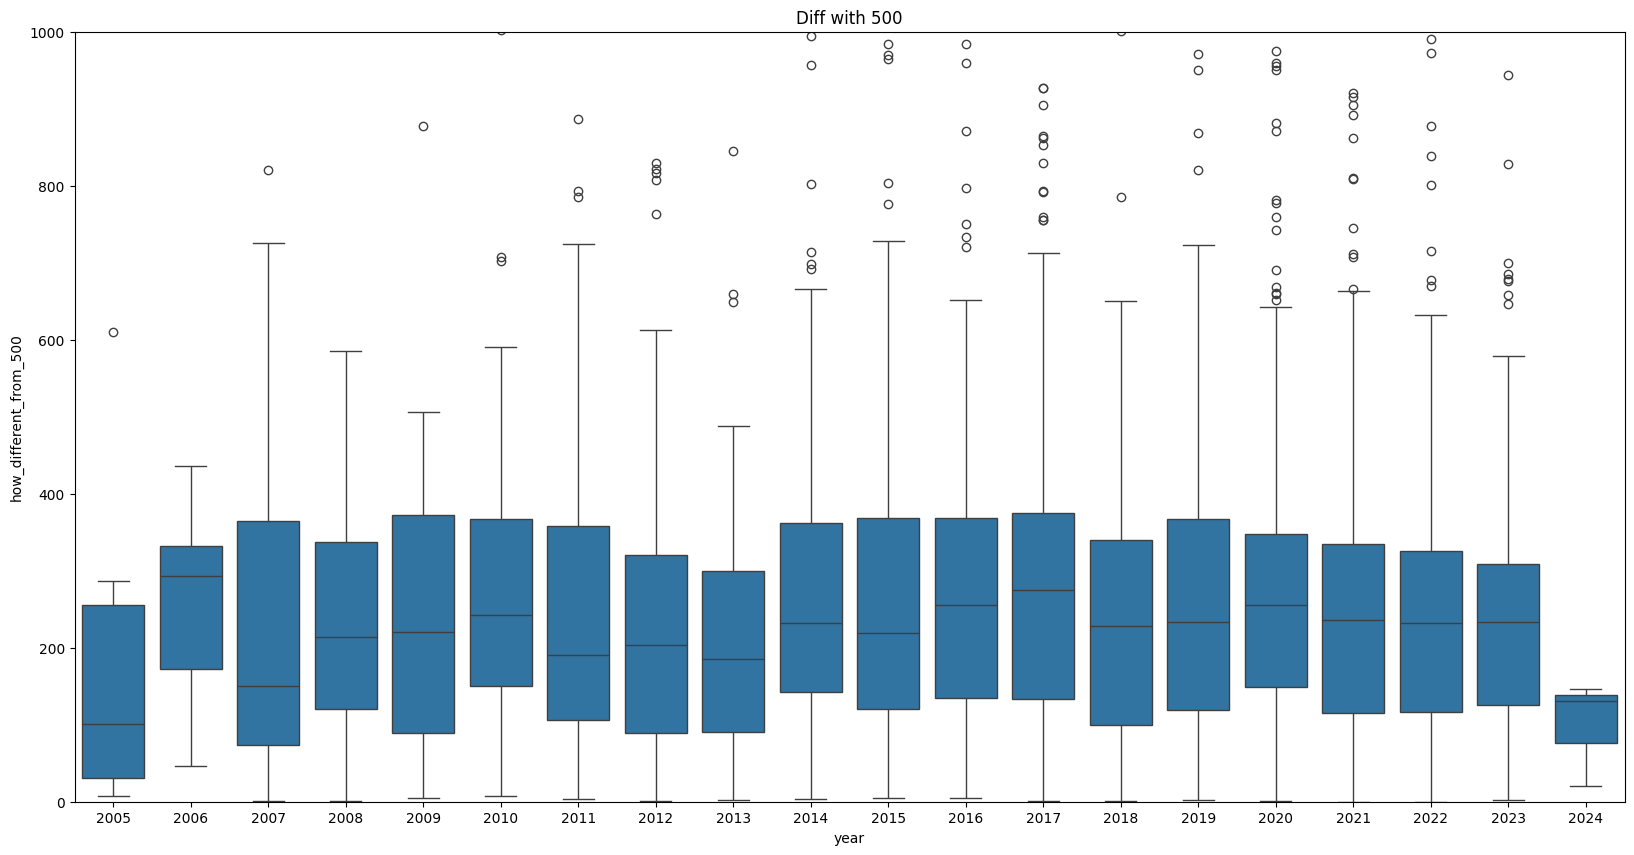

In [79]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, x="year", y="how_different_from_500", fill=True)
plt.ylim(0, 1000)
plt.title("Diff with 500")

(0.0, 2000.0)

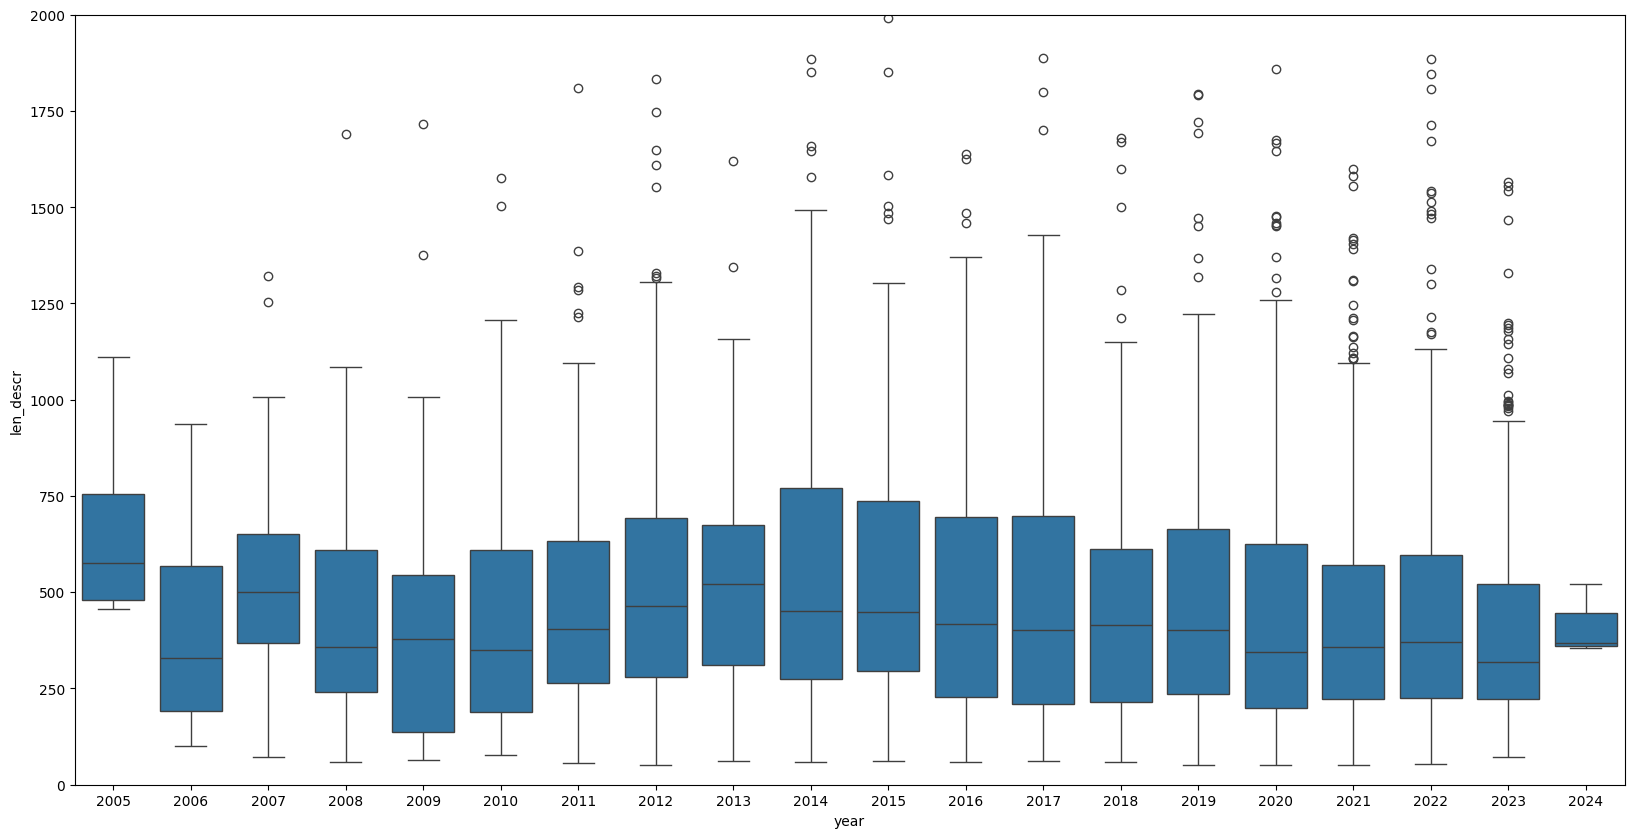

In [10]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, x="year", y="len_descr", fill=True)
plt.ylim(0, 2000)

Какого-т роста длины описаний с годами не наблюдается, зато видим больше "выбросов" с длинными описаниями

## Clustering

In [10]:
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [11]:
features = np.array(df['len_descr']).reshape(-1, 1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [12]:
scaled_features

array([[ 0.54174324],
       [-0.04325196],
       [ 0.06100461],
       ...,
       [-0.34154159],
       [-0.29810136],
       [ 0.14209305]])

In [13]:
kmeans = KMeans(init="random", n_clusters=2, n_init=10,  max_iter=300, random_state=42)

In [15]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=2, random_state=42)

In [16]:
df['cluster'] = kmeans.labels_

In [17]:
cluster_divide = df[df['cluster'] == 0].sort_values(by=['len_descr']).tail(1)['len_descr'].values[0]
print(cluster_divide)

633


(0.0, 2500.0)

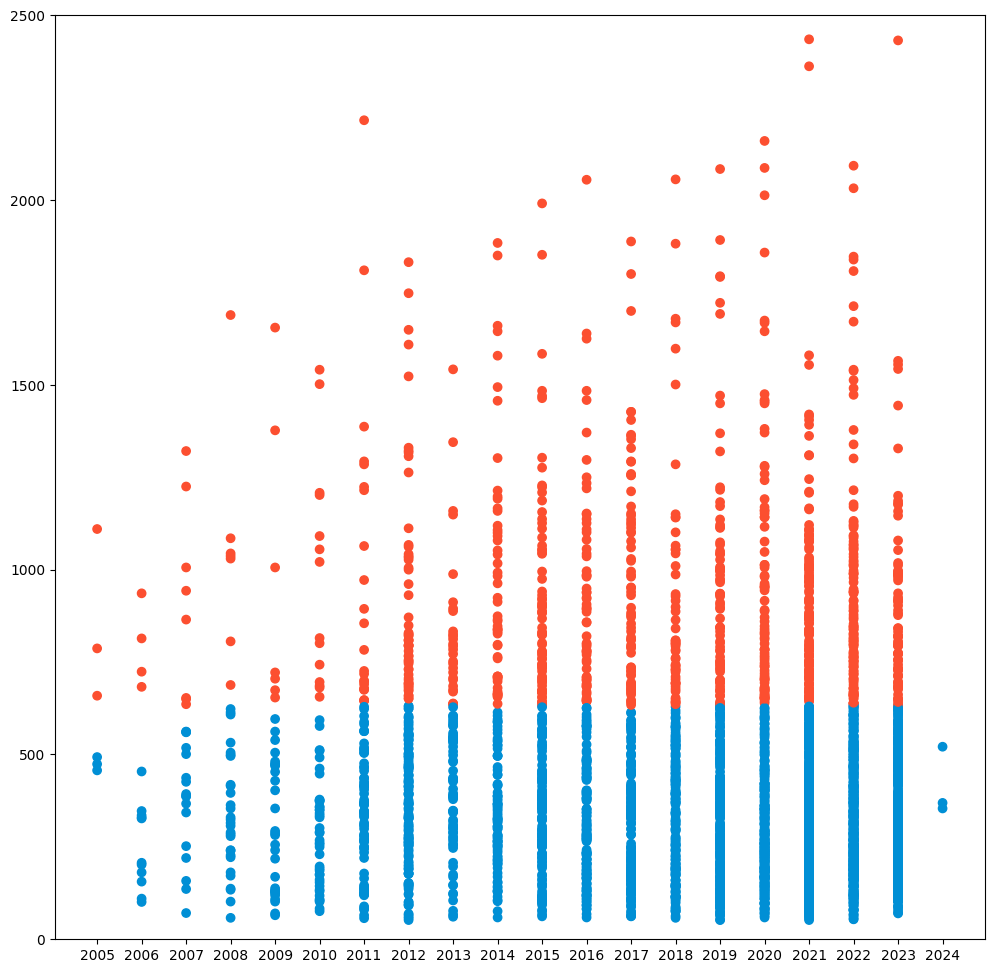

In [18]:
plt.figure(figsize=(12,12))
fte_colors = {
     0: "#008fd5",
     1: "#fc4f30",
     }
km_colors = [fte_colors[label] for label in kmeans.labels_]
plt.scatter(df['year'], df['len_descr'], c=km_colors)
plt.ylim(0, 2500)

In [19]:
short_descr = df[df['cluster'] == 0]
long_descr = df[df['cluster'] == 1]

Text(0.5, 1.0, 'Distribution of short and long descriptions')

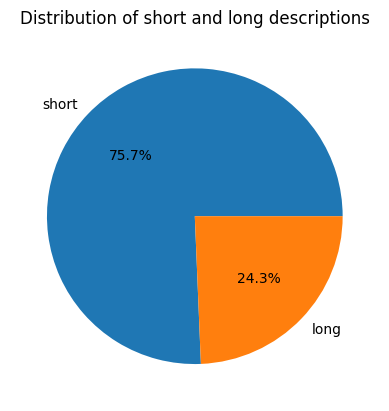

In [20]:
sizes = [len(short_descr) / len(df), len(long_descr) / len(df)]
labels = ['short', 'long']
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of short and long descriptions')

In [21]:
short_descr_median = short_descr['len_descr'].median(numeric_only=True)
long_descr_median = long_descr['len_descr'].median(numeric_only=True)

In [101]:
print("Median for short descriptions = ", short_descr_median)
print("Median for long descriptions = ", long_descr_median)

Median for short descriptions =  299.0
Median for long descriptions =  841.0


In [22]:
short_descr_mean = short_descr['len_descr'].mean(numeric_only=True)
long_descr_mean = long_descr['len_descr'].mean(numeric_only=True)

In [74]:
print("Mean for short descriptions = ", short_descr_mean)
print("Mean for long descriptions = ", long_descr_mean)

Mean for short descriptions =  318.3046900623155
Mean for long descriptions =  949.4260958205913


(0.0, 2000.0)

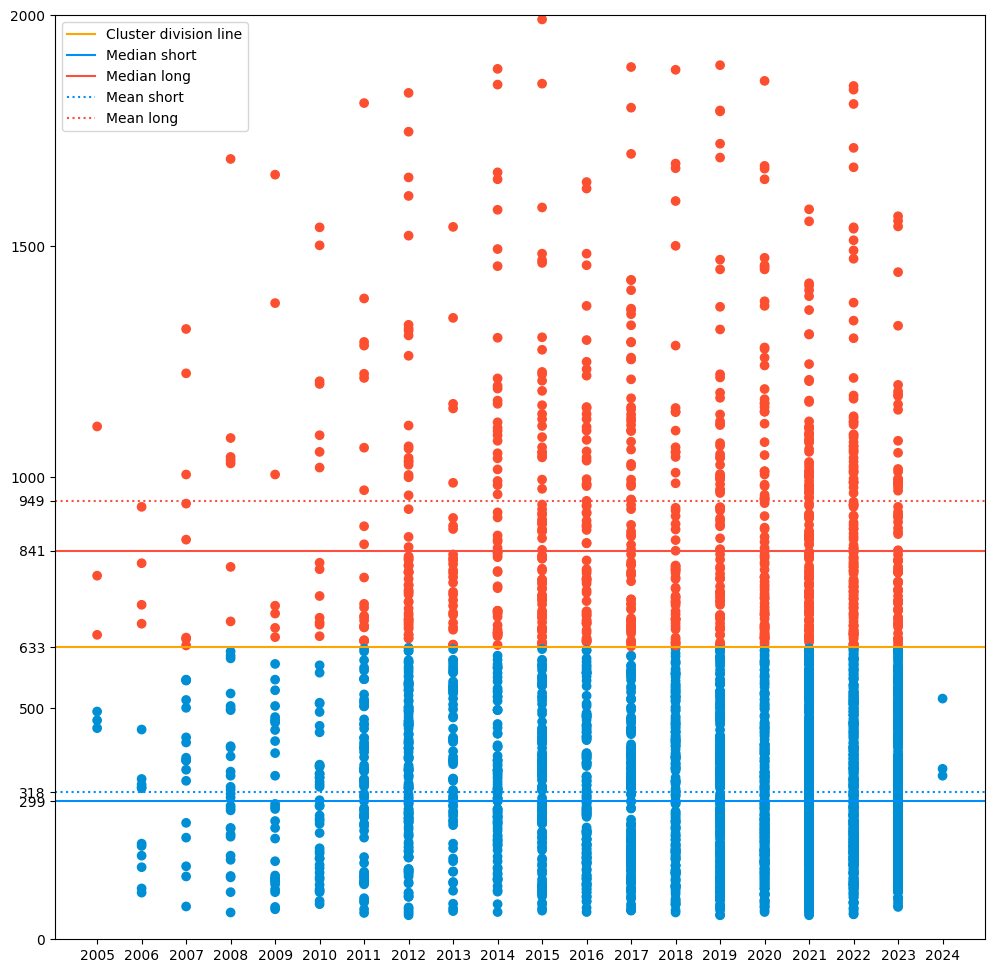

In [78]:
plt.figure(figsize=(12,12))
fte_colors = {
     0: "#008fd5",
     1: "#fc4f30",
     }
median_colors = {
     0: "#008ff8",
     1: "#fc4f40",
     }
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1 = plt.axes()
ax1.scatter(df['year'], df['len_descr'], c=km_colors)
ax1.axhline(cluster_divide, color='orange', label = 'Cluster division line')
ax1.axhline(short_descr_median, color=median_colors[0], label = 'Median short')
ax1.axhline(long_descr_median, color=median_colors[1], label='Median long')
ax1.axhline(short_descr_mean, color=median_colors[0], label = 'Mean short', linestyle=':')
ax1.axhline(long_descr_mean, color=median_colors[1], label='Mean long', linestyle=':')
ax1.set_yticks([0, short_descr_median, short_descr_mean, 500, cluster_divide, long_descr_median, long_descr_mean, 1000, 1500, 2000])
plt.legend(loc='best')
plt.ylim(0, 2000)

## Analysing Separately : Countries

In [23]:
data.index.name = None

In [24]:
def convert_list_str_to_list(text):
    temp = text.strip('][').split(',')
    temp2 = []
    for region in temp:
        industry = region.strip()
        if industry.startswith("\"") or industry.startswith("\'"):
            industry = industry[1:]
        if industry.endswith("\"") or industry.endswith("\'"):
            industry = industry[:-1]

        if ("Remote" in temp2 and industry.endswith("emote")):
            continue
        if industry.endswith("emote"):
            temp2.append("Remote")
            continue
        
        if "/" in industry:
            for i in industry.split("/"):
                i = i.strip()
                if ("United States of America" in temp2 and i == "America") or ("America" in temp2 and i == "United States of America"):
                    continue
                temp2.append(i)
        else:
            temp2.append(industry)
    return temp2

In [25]:
short_add_info = data.loc[short_descr.index.values][['regions', 'all_locations', 'long_description']]
short_add_info['len_descr'] = short_add_info['long_description'].apply(len)
short_add_info = short_add_info.dropna()

short_add_info.head(5)

,regions,all_locations,long_description,len_descr
379,"[""United States of America"", ""America / Canada""]","San Francisco, CA, USA",Founded by Steve Huffman and Alexis Ohanian in...,457
378,"[""United States of America"", ""America / Canada""]","Cambridge, MA, USA",Kiko is a web calendar for anyone who wants to...,493
373,"[""United States of America"", ""America / Canada""]","Mountain View, CA, USA","Loopt, based in Silicon-Valley and backed by l...",474
357,"[""United States of America"", ""America / Canada""]","New York, NY, USA",OMGPOP is a leading developer of social games ...,327
355,"[""United States of America"", ""America / Canada""]","San Francisco, CA, USA",Xobni makes your inbox and address book smarte...,454


In [26]:
def get_all_locations(text):
    text = text.split(";")
    locations = []
    for elem in text:
        elem = elem.strip()
        elem = elem.split(',')[-1].strip()
        locations.append(elem)
    return locations

In [27]:
short_add_info['country'] = short_add_info['all_locations'].apply(get_all_locations)
short_add_info = short_add_info.explode('country')
short_add_info.tail(10)

,regions,all_locations,long_description,len_descr,country
27984,"[""Saudi Arabia"", ""Middle East and North Africa...","Riyadh, Riyadh Province, Saudi Arabia",Sirdab is a tech-ops focused startup offering ...,329,Saudi Arabia
27986,"[""United States of America"", ""America / Canada...","Mountain View, CA, USA; Remote",India is set to be one of the fastest growing ...,461,USA
27986,"[""United States of America"", ""America / Canada...","Mountain View, CA, USA; Remote",India is set to be one of the fastest growing ...,461,Remote
27974,"[""United States of America"", ""Germany"", ""Ameri...","New York, NY, USA; Berlin, Berlin, Germany",Fastgen is a low-code API and workflow builder...,284,USA
27974,"[""United States of America"", ""Germany"", ""Ameri...","New York, NY, USA; Berlin, Berlin, Germany",Fastgen is a low-code API and workflow builder...,284,Germany
28982,"[""United States of America"", ""America / Canada""]","San Francisco, CA, USA","Flint is ChatGPT for K-12. With Flint, schools...",124,USA
29180,"[""Canada"", ""United States of America"", ""Americ...","Vancouver, BC, Canada; San Francisco, CA, USA",AgentHub is a platform for automating repetiti...,354,Canada
29180,"[""Canada"", ""United States of America"", ""Americ...","Vancouver, BC, Canada; San Francisco, CA, USA",AgentHub is a platform for automating repetiti...,354,USA
29201,"[""Sweden"", ""Europe"", ""Remote"", ""Partly Remote""]","Stockholm, Stockholm County, Sweden",Leya is an AI assistant designed for legal pro...,369,Sweden
29226,"[""United States of America"", ""America / Canada""]","San Francisco, CA, USA",Onboard lets you chat with any codebase of up ...,521,USA


Let's calculate mean values wrt to countries

In [28]:
mean_countries = short_add_info.groupby('country').mean(numeric_only=True)
mean_countries_cnt = short_add_info.groupby('country').count()
mean_countries_cnt = mean_countries_cnt.sort_values(by='long_description', ascending=False)[:10]
countries = mean_countries_cnt.index

In [29]:
plot_df = short_add_info[short_add_info['country'].isin(countries.values)][['len_descr', 'country']]
plot_df.head(10)

,len_descr,country
379,457,USA
378,493,USA
373,474,USA
357,327,USA
355,454,USA
365,347,USA
363,202,USA
358,110,USA
371,156,USA
372,207,USA


In [30]:
plot_mean_countries = plot_df.groupby('country').median(numeric_only=True)
plot_mean_countries = plot_mean_countries.sort_values(by='len_descr', ascending=False)

In [31]:
plot_mean_countries

,len_descr
country,
Canada,322.5
USA,307.0
India,289.0
Germany,287.0
Remote,284.5
France,282.5
Brazil,280.0
United Kingdom,276.5
Mexico,250.0


In [32]:
counters = mean_countries_cnt['regions'].values

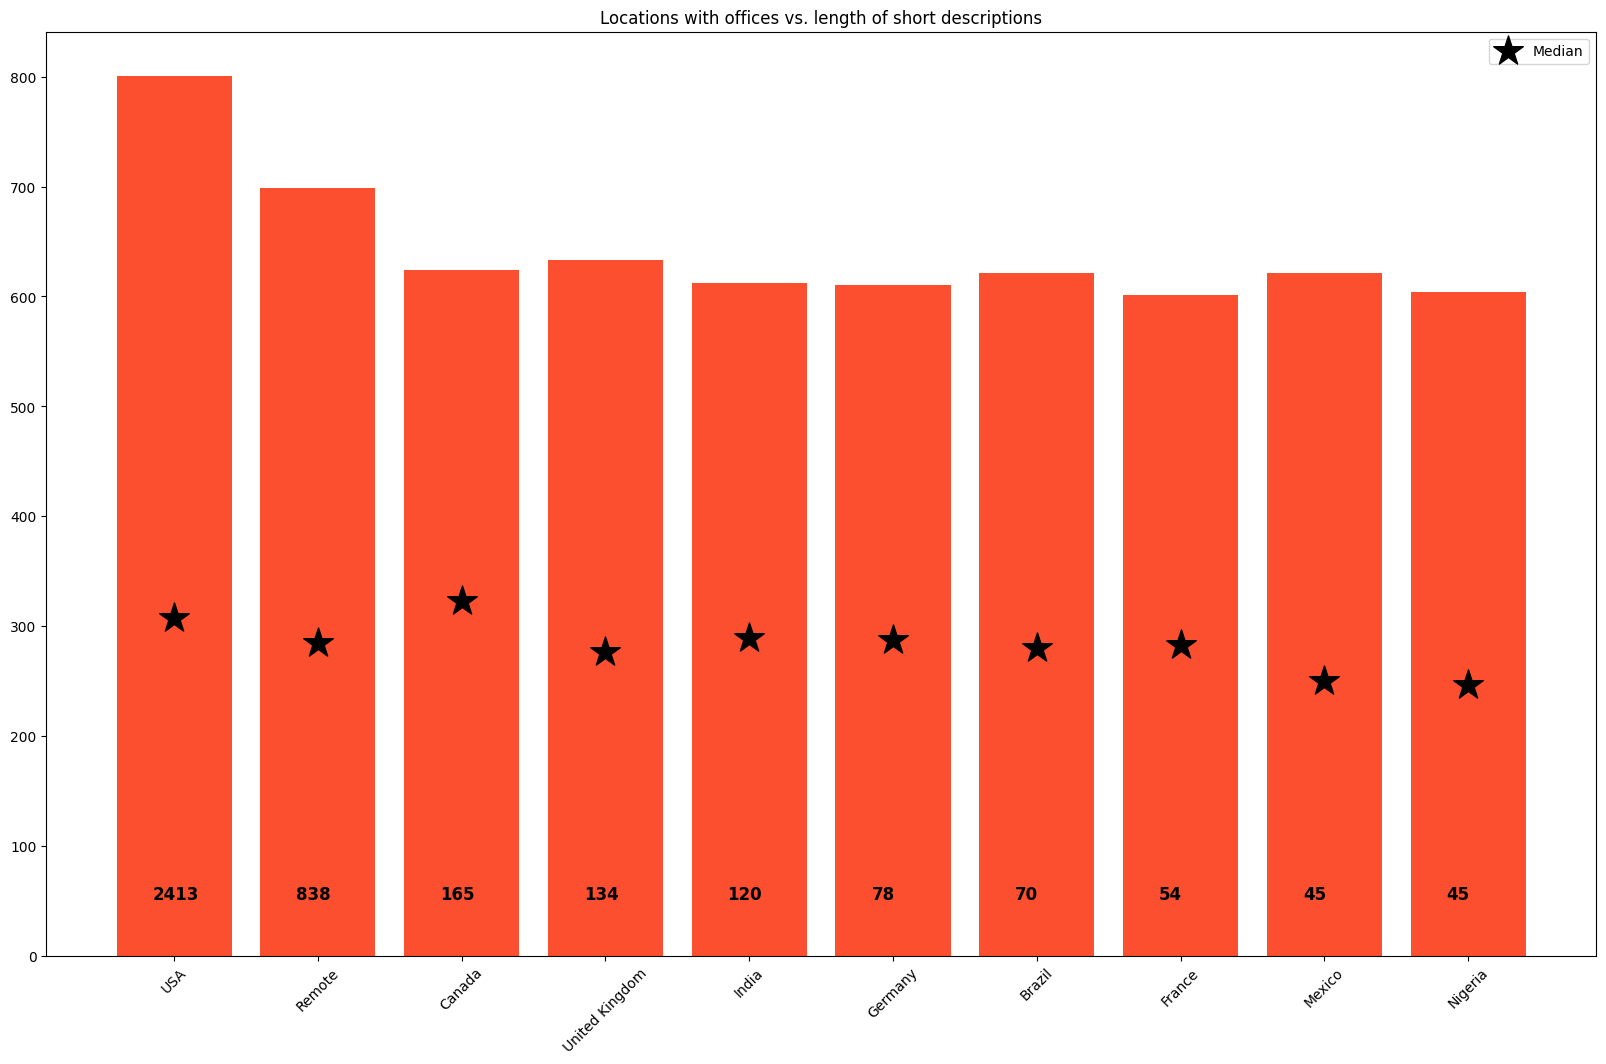

In [33]:
fig, ax = plt.subplots(figsize=(20,12))
bars = ax.bar(plot_df['country'], plot_df['len_descr'], color='#fc4f30')
ax.scatter(plot_mean_countries.index, plot_mean_countries['len_descr'], s=500, marker=('*'), c='black', label='Median')
ax.tick_params(axis='x', rotation=45)
for i, v in enumerate(counters):
    ax.text(i - 0.15, 
              v /counters[i]+50, 
              counters[i], color='black', weight='bold', size='large')
plt.title("Locations with offices vs. length of short descriptions")
plt.legend();

### Now long descriptions

In [34]:
long_add_info = data.loc[long_descr.index.values][['regions', 'all_locations', 'long_description']]

In [35]:
long_add_info['len_descr'] = long_add_info['long_description'].apply(len)
long_add_info = long_add_info.dropna()
long_add_info.head(10)

,regions,all_locations,long_description,len_descr
380,"[""United Kingdom"", ""Europe""]","London, England, United Kingdom",What is Infogami?\n\nThe art of transforming d...,659
375,"[""United States of America"", ""America / Canada""]","San Francisco, CA, USA",ClickFacts is a Malware Software Solutions com...,787
374,"[""United States of America"", ""America / Canada""]","Redmond, WA, USA","Founded in 2005, TextPayMe is an SMS payment s...",1110
356,"[""United States of America"", ""America / Canada""]","San Francisco, CA, USA",Read and listen without limits. Unlimited* aud...,683
370,"[""United States of America"", ""America / Canada""]","Tampa, FL, USA",Wufoo is a web application that helps anybody ...,814
367,"[""United States of America"", ""America / Canada""]","San Francisco, CA, USA",Clustrix provides the leading scale-out relati...,936
369,"[""United States of America"", ""America / Canada""]","Bethesda, MD, USA","Finding wedding vendors is hard. In 2007, a co...",724
336,"[""United States of America"", ""America / Canada""]","San Francisco, CA, USA",Y Combinator funded AppJet is an online progra...,865
324,"[""United Kingdom"", ""Europe""]","England, United Kingdom",Songkick is the great live music startup. Sinc...,1254
329,"[""United States of America"", ""America / Canada""]","San Francisco, CA, USA","Hello, Chair Inc. was founded in 2006 by Luke ...",943


In [36]:
long_add_info['country'] = long_add_info['all_locations'].apply(get_all_locations)
long_add_info = long_add_info.explode('country')
long_add_info.tail(10)

,regions,all_locations,long_description,len_descr,country
27936,"[""India"", ""South Asia"", ""Remote"", ""Partly Remo...","Jaipur, RJ, India; Surat, GJ, India",Small shop owners earn daily unlike salaried p...,695,India
27924,"[""United States of America"", ""America / Canada""]","Mountain View, CA, USA",OutSail Technologies is building unlimited-ran...,821,USA
27919,"[""United States of America"", ""America / Canada""]","San Francisco, CA, USA",Helicone is an open-source observability platf...,821,USA
27914,"[""United States of America"", ""America / Canada...","San Francisco, CA, USA",Electric Air is combining modern heat pump tec...,971,USA
27961,"[""United States of America"", ""America / Canada...","American Fork, UT, USA",Hona is a software application that allows for...,978,USA
28070,"[""United States of America"", ""America / Canada""]","New York, NY, USA",Clad is contractor management software for tel...,642,USA
28069,"[""United States of America"", ""America / Canada""]","San Francisco, CA, USA",Pylon allows B2B companies to meet their custo...,890,USA
28018,"[""Germany"", ""Europe"", ""Remote"", ""Partly Remote""]","Munich, BY, Germany",Sanvivo builds a multisided platform to enable...,819,Germany
27972,"[""France"", ""Europe""]","Paris, Île-de-France, France",Defer enables Node.js developers to move slow ...,987,France
27985,"[""United States of America"", ""America / Canada...","New York, NY, USA",Onu is a developer-first tool that allows engi...,648,USA


In [37]:
mean_countries = long_add_info.groupby('country').mean(numeric_only=True)
mean_countries_cnt = long_add_info.groupby('country').count()
mean_countries_cnt = mean_countries_cnt.sort_values(by='long_description', ascending=False)[:10]
countries = mean_countries_cnt.index

In [38]:
mean_countries_cnt

,regions,all_locations,long_description,len_descr
country,,,,
USA,814,814,814,814
Remote,242,242,242,242
India,72,72,72,72
United Kingdom,48,48,48,48
Canada,39,39,39,39
Nigeria,22,22,22,22
Singapore,20,20,20,20
France,17,17,17,17
Mexico,14,14,14,14


In [39]:
long_countries = mean_countries_cnt['regions'].values

In [40]:
long_df = long_add_info[long_add_info['country'].isin(countries.values)][['len_descr', 'country']]
long_df.head(10)

,len_descr,country
380,659,United Kingdom
375,787,USA
374,1110,USA
356,683,USA
370,814,USA
367,936,USA
369,724,USA
336,865,USA
324,1254,United Kingdom
329,943,USA


In [41]:
plot_mean_countries = long_df.groupby('country').median(numeric_only=True)
plot_mean_countries = plot_mean_countries.sort_values(by='len_descr', ascending=False)

In [87]:
plot_mean_countries.head(10)

,len_descr
country,
France,987.0
Singapore,932.5
United Kingdom,905.5
India,893.0
Canada,865.0
USA,841.0
Remote,838.0
Nigeria,811.0
Mexico,772.5


Text(0.5, 1.0, 'Locations with offices vs. length of long descriptions')

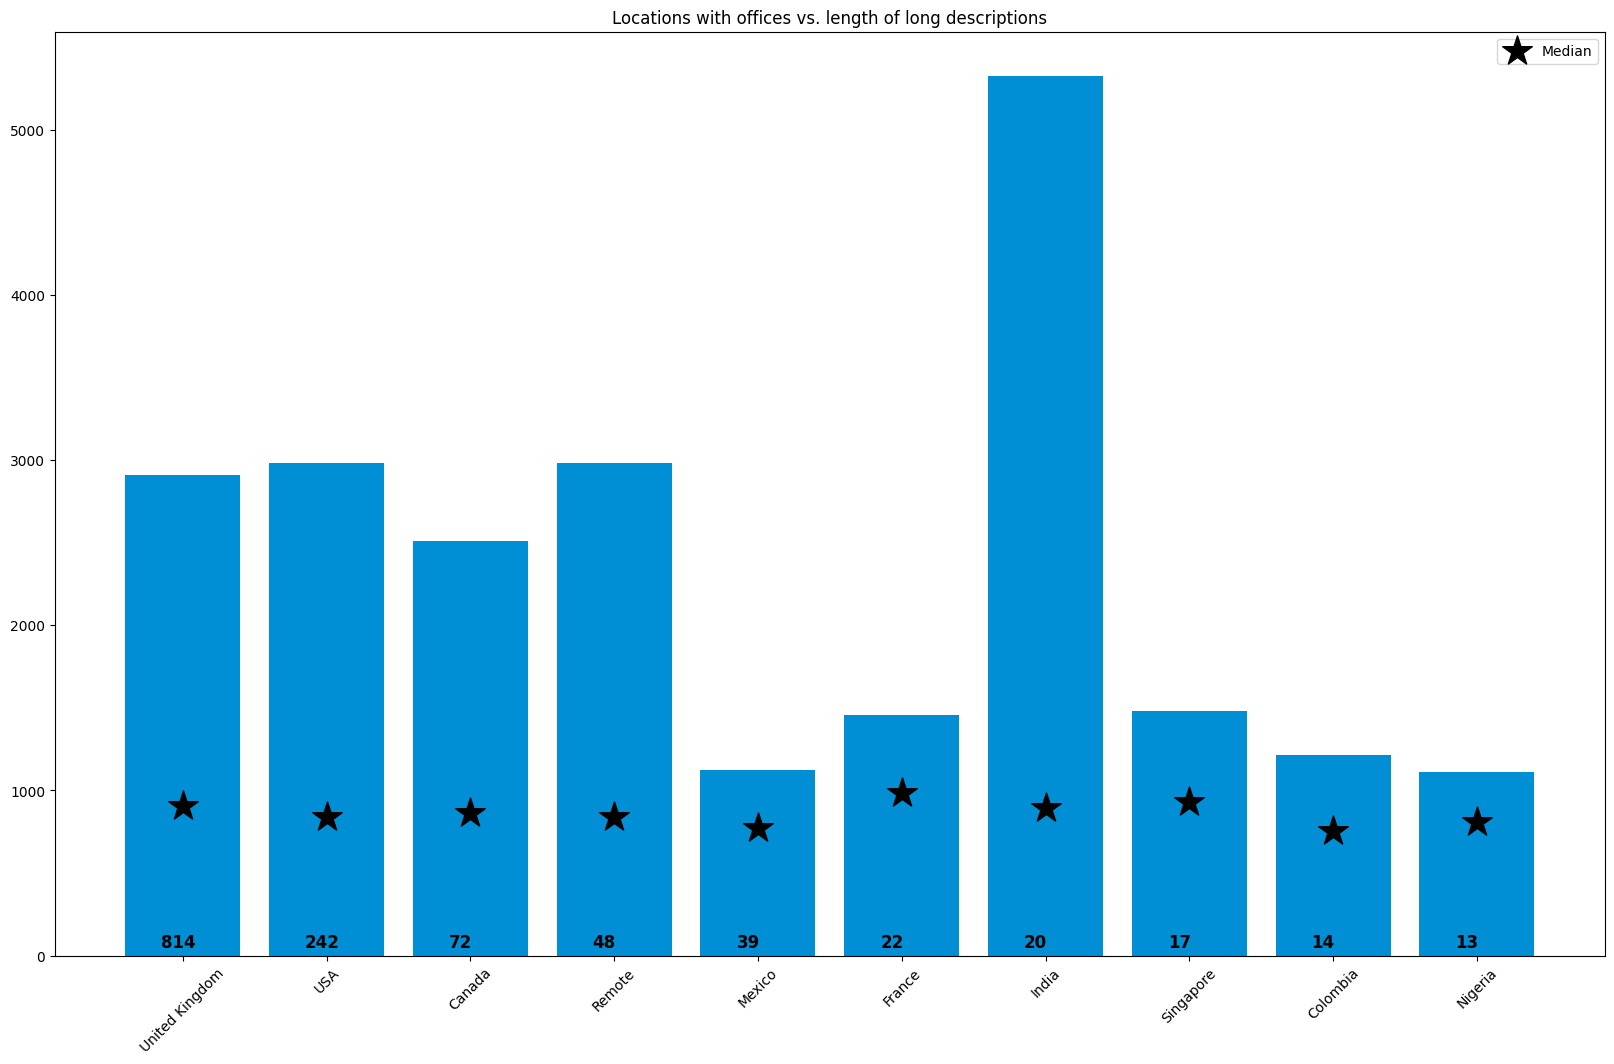

In [91]:
fig, ax = plt.subplots(figsize=(20,12))
bars = ax.bar(long_df['country'], long_df['len_descr'], color='#008fd5')
ax.scatter(plot_mean_countries.index, plot_mean_countries['len_descr'], s=500, marker=('*'), c='black', label='Median')
ax.tick_params(axis='x', rotation=45)
for i, v in enumerate(long_countries):
    ax.text(i - 0.15, 
              v /long_countries[i]+50, 
              long_countries[i], color='black', weight='bold', size='large')
plt.legend()
plt.title("Locations with offices vs. length of long descriptions")

France has the biggest median, but the locastions with outliers here Remote and USA

## Industries

### Long

In [42]:
long_descr = long_descr[long_descr['len_descr'] < 3000]
long_info = data.loc[long_descr.index.values][['industries']]
long_df = pd.concat([long_info, long_descr],axis=1)
long_df = long_df.drop(['cluster', 'how_different_from_500'], axis=1)

In [43]:
def convert_list_str_to_list(text):
    temp = text.strip('][').split(',')
    temp2 = []
    for i in temp:
        industry = i.strip()
        if industry.startswith("\"") or industry.startswith("\'"):
            industry = industry[1:]
        if industry.endswith("\"") or industry.endswith("\'"):
            industry = industry[:-1]
        temp2.append(industry)
    return temp2

In [44]:
long_df['industries'] = long_df['industries'].apply(convert_list_str_to_list)
long_df = long_df.explode('industries')

In [45]:
long_df.head(5)

,industries,year,descr,len_descr
380,B2B,2005,What is Infogami?\n\nThe art of transforming d...,659
380,Analytics,2005,What is Infogami?\n\nThe art of transforming d...,659
375,B2B,2005,ClickFacts is a Malware Software Solutions com...,787
375,Security,2005,ClickFacts is a Malware Software Solutions com...,787
374,Fintech,2005,"Founded in 2005, TextPayMe is an SMS payment s...",1110


In [51]:
industries_counter = long_df.groupby('industries').count()
not_common_industries = industries_counter[industries_counter['len_descr'] <= 5].index

In [52]:
industries_counter = industries_counter.drop(not_common_industries)
counter = industries_counter.sort_values(by='year', ascending=False)[['year']]
counter

,year
industries,
B2B,391
Consumer,164
Healthcare,151
Fintech,119
Engineering,70
Product and Design,70
Industrials,55
Education,54
Infrastructure,41


In [53]:
medianed_industries = long_df.groupby('industries').median(numeric_only=True)
medianed_industries = medianed_industries.drop(not_common_industries, axis=0)
medianed_industries = medianed_industries.drop('Unspecified', axis=0)
medianed_industries = medianed_industries.sort_values('len_descr', ascending=False)

In [54]:
medianed_industries.head(5)

,len_descr
industries,
Travel,1164.5
Leisure and Tourism,1164.5
Consumer Finance,1110.0
Drug Discovery and Delivery,1059.0
Office Management,1033.0


In [74]:
def append_mean(text):
    industry_value = medianed_industries.loc[text]['len_descr']
    return industry_value

temp = long_df[long_df['industries'].isin(medianed_industries.index.values)]
temp['mean'] = temp['industries'].apply(append_mean)
temp = temp.sort_values(by='mean', ascending=False)

/var/folders/bz/1tlnq74x49v0f7m4cm3dzs6r0000gp/T/ipykernel_6400/905651168.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['mean'] = temp['industries'].apply(append_mean)


In [120]:
counter = temp.groupby('industries').count()[['year']].sort_values(by='year', ascending=False)
max_len = temp.groupby('industries').max()[['len_descr']].rename(columns={"len_descr": "max_len"})
counter_idx = [i[0] for i in counter]
final_long_descr_info = pd.concat([counter,medianed_industries, max_len], axis=1)
final_long_descr_info = final_long_descr_info.rename(columns={'year': 'count'})
final_long_descr_info.head(5)

,count,len_descr,max_len
industries,,,
B2B,391,840.0,2887
Consumer,164,843.5,2216
Healthcare,151,877.0,2877
Fintech,119,838.0,2013
Product and Design,70,832.5,2435


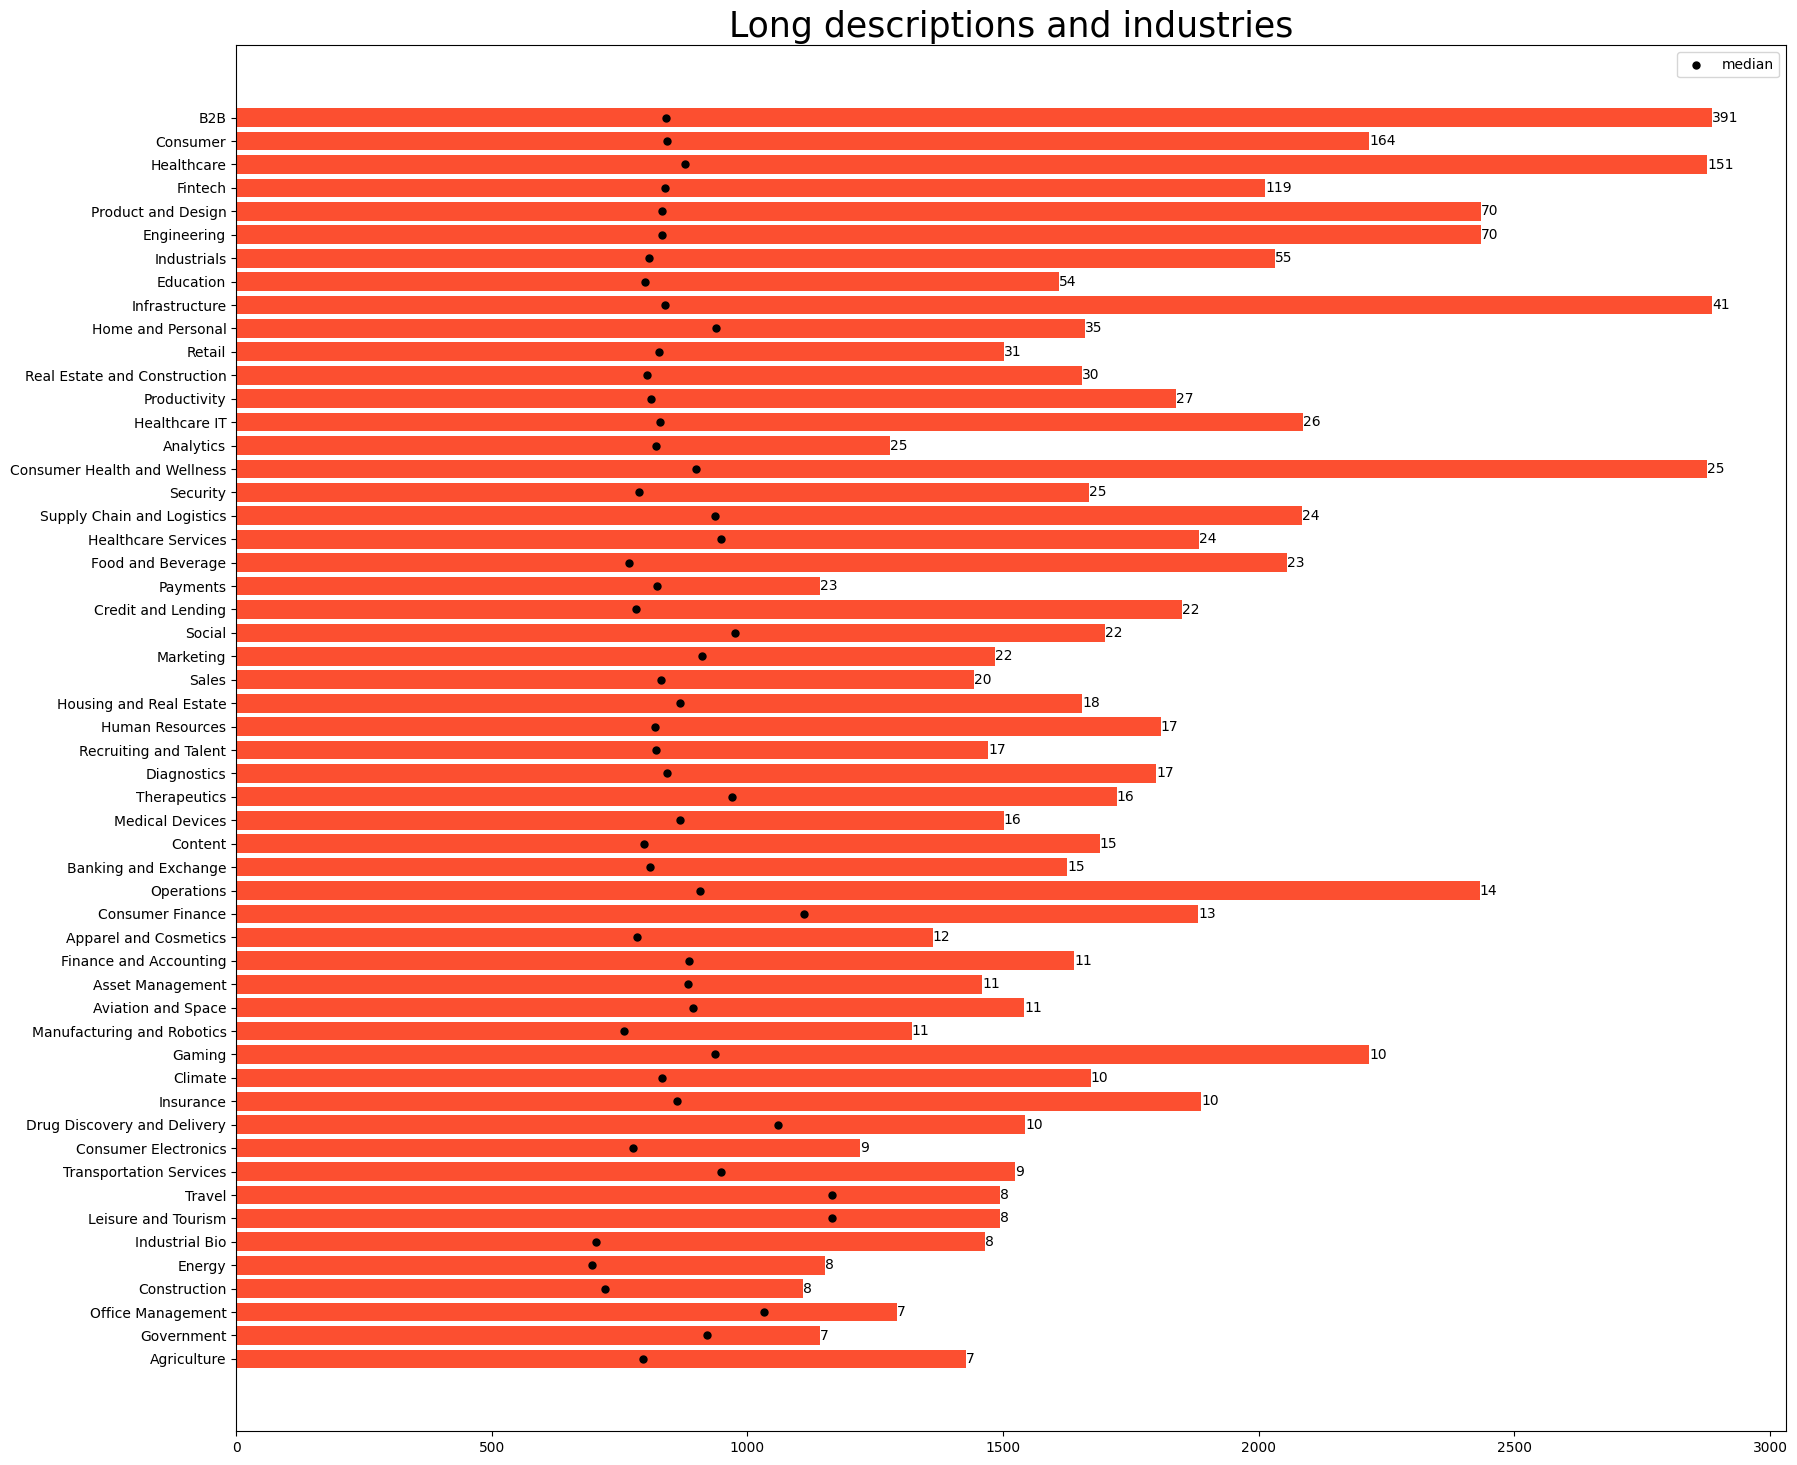

In [131]:
fig, ax = plt.subplots(figsize=(20,18))
hbars = ax.barh(final_long_descr_info.index, final_long_descr_info['max_len'], color='#fc4f30')
ax.bar_label(hbars, labels=final_long_descr_info['count'])
ax.invert_yaxis()
ax.scatter(medianed_industries['len_descr'], medianed_industries.index, s=100, marker=('.'), color='black', label='median')
# ax.tick_params(axis='x', rotation=45)
# for i, v in enumerate(counter_idx):
#     ax.text(i - 0.3, 
#               v /counter_idx[i]+50, 
#               counter_idx[i], color='black', size='large', weight='bold')
plt.title("Long descriptions and industries", fontsize=25)
plt.legend()

### Short

In [132]:
short_info = data.loc[short_descr.index.values][['industries']]
short_df = pd.concat([short_info, short_descr],axis=1)
short_df = short_df.drop(['cluster', 'how_different_from_500'], axis=1)

In [133]:
short_df['industries'] = short_df['industries'].apply(convert_list_str_to_list)
short_df = short_df.explode('industries')
short_df.head(5)

,industries,year,descr,len_descr
379,Consumer,2005,Founded by Steve Huffman and Alexis Ohanian in...,457
379,Content,2005,Founded by Steve Huffman and Alexis Ohanian in...,457
378,B2B,2005,Kiko is a web calendar for anyone who wants to...,493
378,Productivity,2005,Kiko is a web calendar for anyone who wants to...,493
373,Consumer,2005,"Loopt, based in Silicon-Valley and backed by l...",474


In [134]:
industries_counter_sh = short_df.groupby('industries').count()
not_common_industries_sh = industries_counter_sh[industries_counter_sh['len_descr'] <= 5].index

In [135]:
industries_counter_sh.sort_values(by='year', ascending=False)[['year']].head(7)

,year
industries,
B2B,1463
Consumer,508
Fintech,374
Healthcare,320
Engineering,302
Product and Design,302
Industrials,153


In [136]:
medianed_industries_sh = short_df.groupby('industries').median(numeric_only=True)
medianed_industries_sh = medianed_industries_sh.drop(not_common_industries_sh, axis=0)
medianed_industries_sh = medianed_industries_sh.drop('Unspecified', axis=0)
medianed_industries_sh = medianed_industries_sh.sort_values('len_descr', ascending=False)

In [137]:
def append_mean1(text):
    industry_value = medianed_industries_sh.loc[text]['len_descr']
    return industry_value

temp_sh = short_df[short_df['industries'].isin(medianed_industries_sh.index.values)]
temp_sh['mean'] = temp_sh['industries'].apply(append_mean1)
temp_sh = temp_sh.sort_values(by='mean');

/var/folders/bz/1tlnq74x49v0f7m4cm3dzs6r0000gp/T/ipykernel_6400/1201720785.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_sh['mean'] = temp_sh['industries'].apply(append_mean1)


In [138]:
counter_sh = temp_sh.groupby('industries').count()[['year']].sort_values(by='year', ascending=False)
max_len_sh = temp_sh.groupby('industries').max()[['len_descr']].rename(columns={"len_descr": "max_len"})
final_short_descr_info = pd.concat([counter_sh,medianed_industries_sh, max_len_sh], axis=1)
final_short_descr_info = final_short_descr_info.rename(columns={'year': 'count'})
final_short_descr_info.head(5)

,count,len_descr,max_len
industries,,,
B2B,1463,290.0,632
Consumer,508,299.0,633
Fintech,374,288.5,632
Healthcare,320,321.5,631
Engineering,302,278.5,630


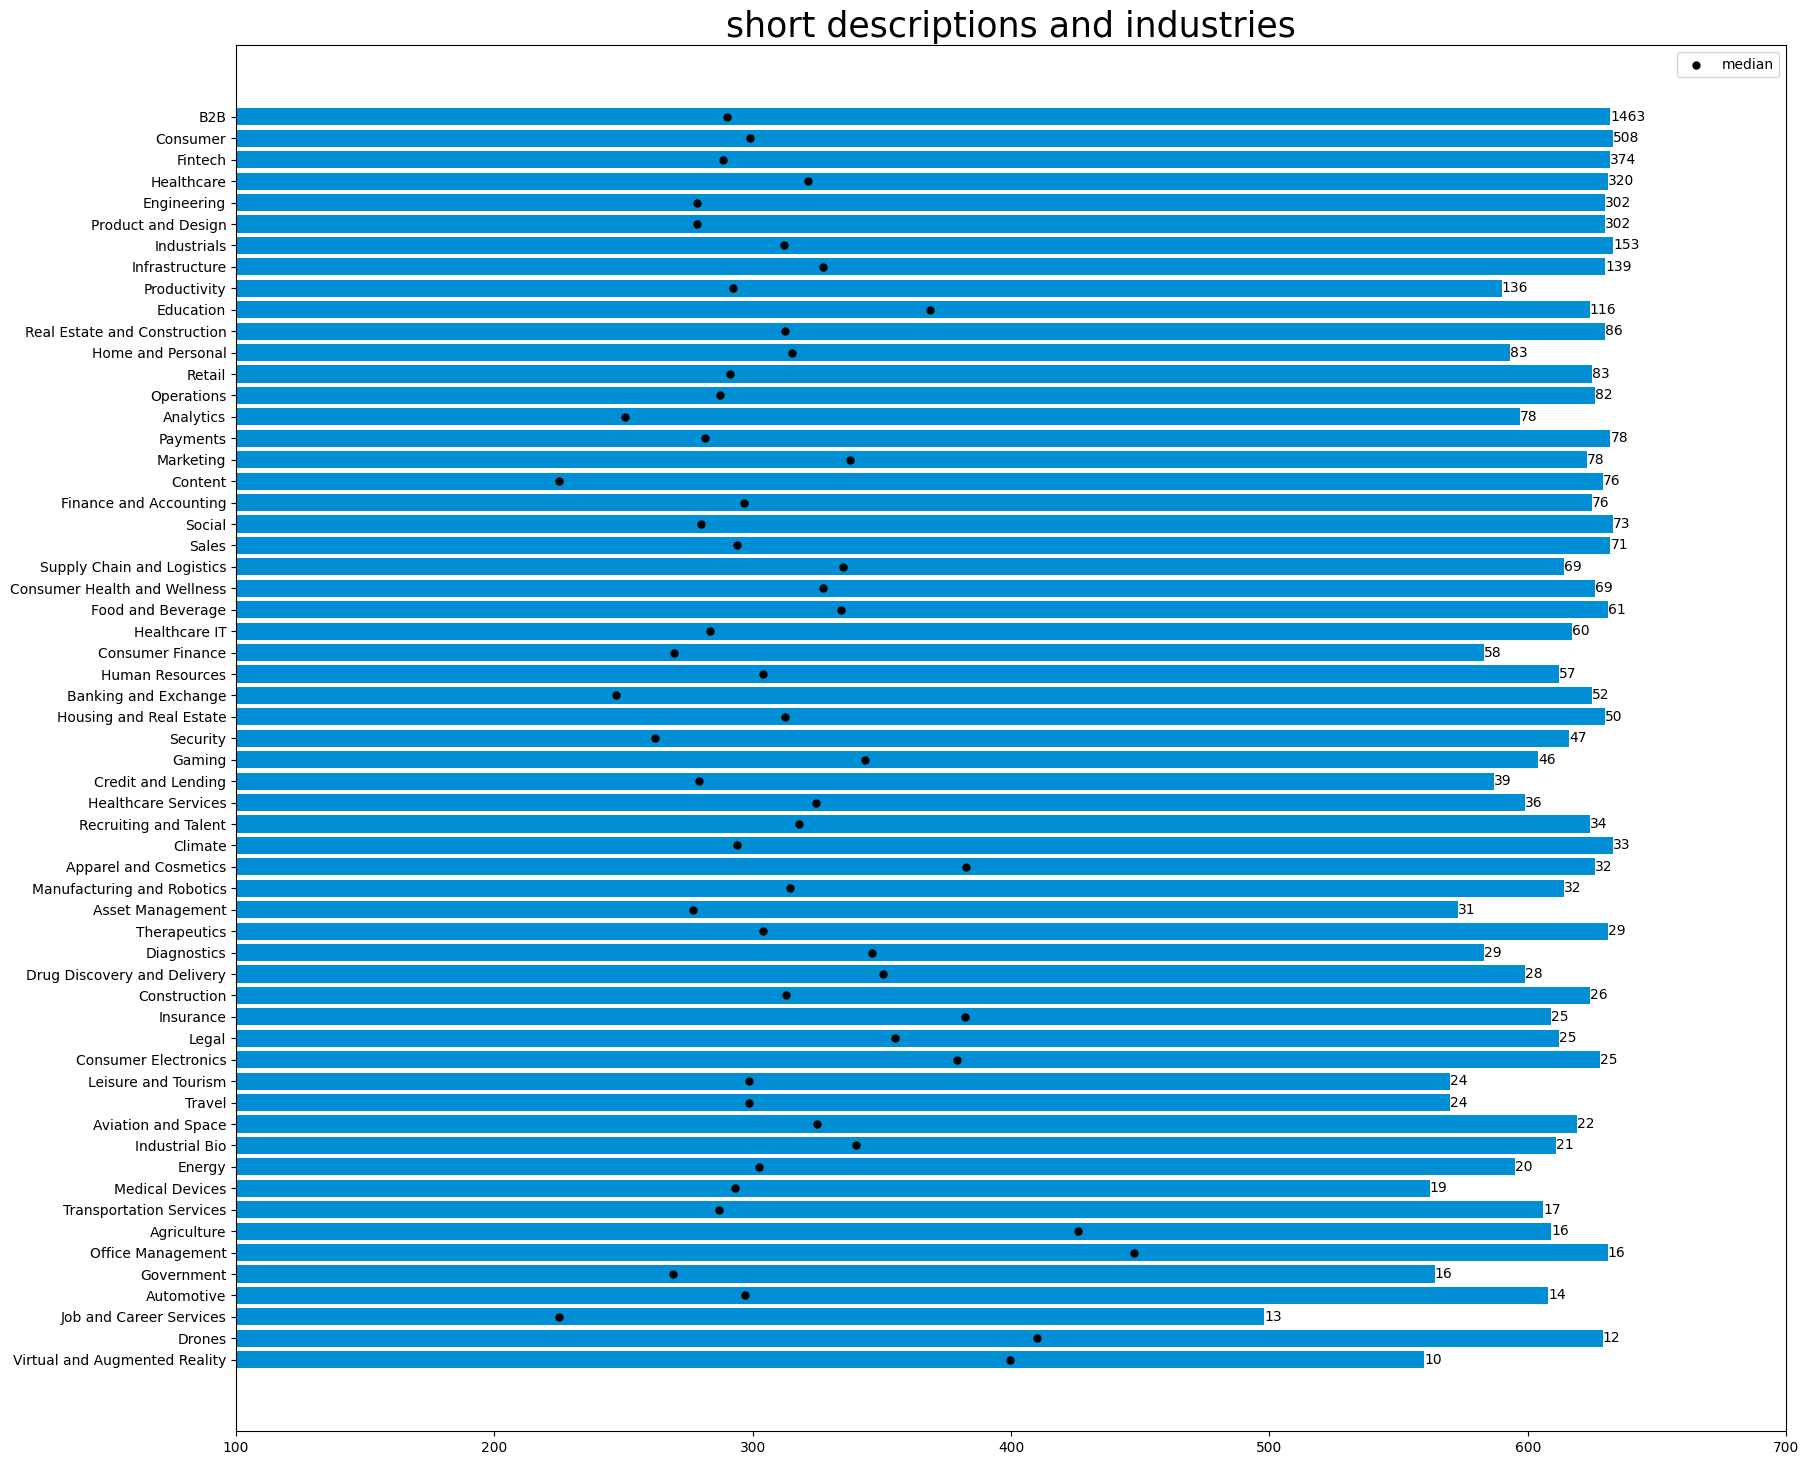

In [157]:
fig, ax = plt.subplots(figsize=(20,18))
hbars = ax.barh(final_short_descr_info.index, final_short_descr_info['max_len'], color='#008fd5')
ax.bar_label(hbars, labels=final_short_descr_info['count'])
ax.invert_yaxis()
ax.scatter(medianed_industries_sh['len_descr'], medianed_industries_sh.index, s=100, marker=('.'), color='black', label='median')
plt.title("short descriptions and industries", fontsize=25)
plt.xlim(100, 700)
plt.legend()

# Some other NLP techniques

In [305]:
# !git clone https://github.com/amueller/word_cloud.git
# !cd word_cloud
!pip install wordcloud

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 1.3 MB/s eta 0:00:00a 0:00:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


## Tokenization + Lemmatization

In [145]:
from prepare import *

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anastasia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [146]:
df['cleaned_descr'] = df['descr'].apply(clean)

In [147]:
df['cleaned_descr'].head(1).values[0]

'infogami art transforming data meaningful information infogami business intelligence bi solution turn raw data information enables business gain insight improve decision making reduce cost support strategic objective subject matter expertise central infogami ethos ability communicate effectively understand requirement separate infogami bi solution bridging gap information collaboration infogami solution enhance collaborative decision making interaction improves communication information sharing process within organisation'

In [148]:
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [149]:
whole_text = " ".join(df.cleaned_descr)

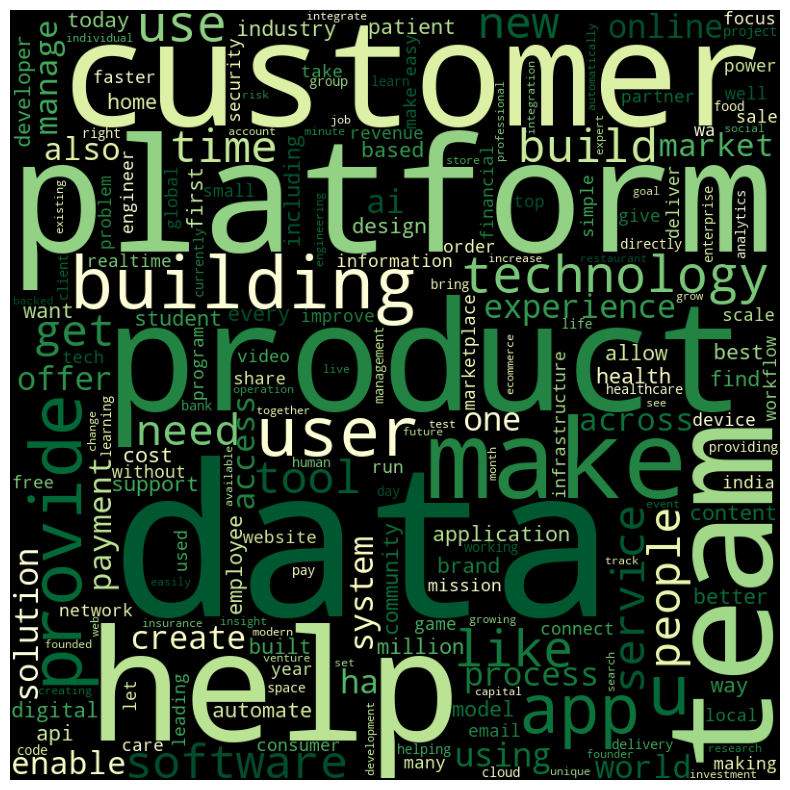

In [156]:
plt.figure(figsize=(10,10))
wc = WordCloud(max_words=200, stopwords = ['company', 'business', 'startup', 'work'], colormap='YlGn_r', width = 800, height = 800).generate(whole_text)
plt.imshow(wc)
plt.axis("off");

Now, let's the same try with clusters

In [345]:
short_add_info['cleaned_descr'] = short_add_info['long_description'].apply(clean)

In [346]:
long_add_info['cleaned_descr'] = long_add_info['long_description'].apply(clean)

In [347]:
whole_short_descriptions_text = " ".join(short_add_info.long_description)
whole_long_descriptions_text = " ".join(long_add_info.long_description)

In [352]:
stopwords_wc = ['company', 'business', 'startup', 'work']
stops = set(stopwords.words('english'))
stopwords_wc.extend(stops)

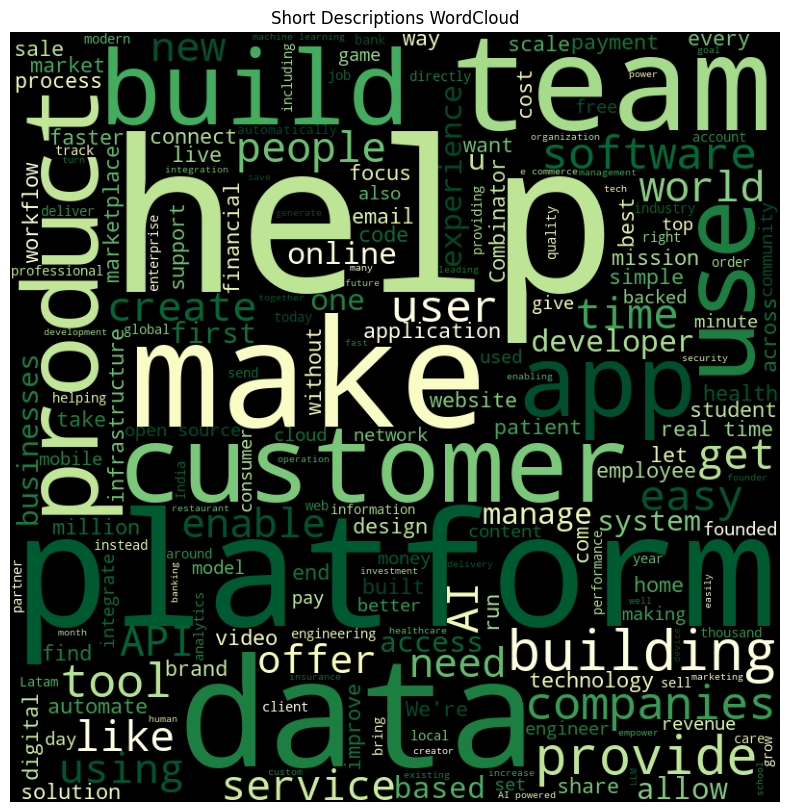

In [356]:
plt.figure(figsize=(10,10))
wc = WordCloud(max_words=200, stopwords = stopwords_wc, colormap='YlGn_r', width = 800, height = 800).generate(whole_short_descriptions_text)
plt.imshow(wc)
plt.title("Short Descriptions WordCloud")
plt.axis("off");

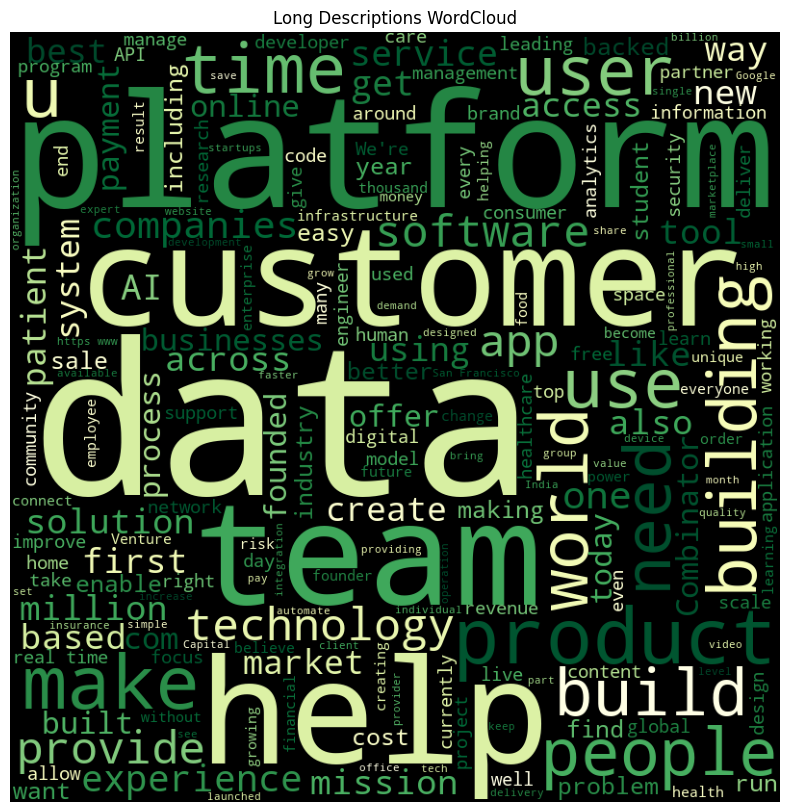

In [357]:
plt.figure(figsize=(10,10))
wc = WordCloud(max_words=200, stopwords = stopwords_wc, colormap='YlGn_r', width = 800, height = 800).generate(whole_long_descriptions_text)
plt.imshow(wc)
plt.title("Long Descriptions WordCloud")
plt.axis("off");

Platform, customer, data, help, team - common words for both